In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [4]:
df = pd.read_csv('./data/vgsales.csv')
vg_reviews = pd.read_csv('./data/video_games_reviews.csv')
vg_reviews.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data Cleaning

In [60]:
# convert str year to date
vg_reviews['Year'] = pd.to_datetime(vg_reviews['Year']).dt.year
# df['Year'] = pd.to_datetime(df['Year']).dt.year
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### Check Missing Values

In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
total_cells = np.product(df.shape)
total_missing_values = df.isna().sum()
percent_missing = (total_missing_values.sum() / total_cells) * 100
percent_missing

0.18019695691704368

In [61]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<AxesSubplot:>

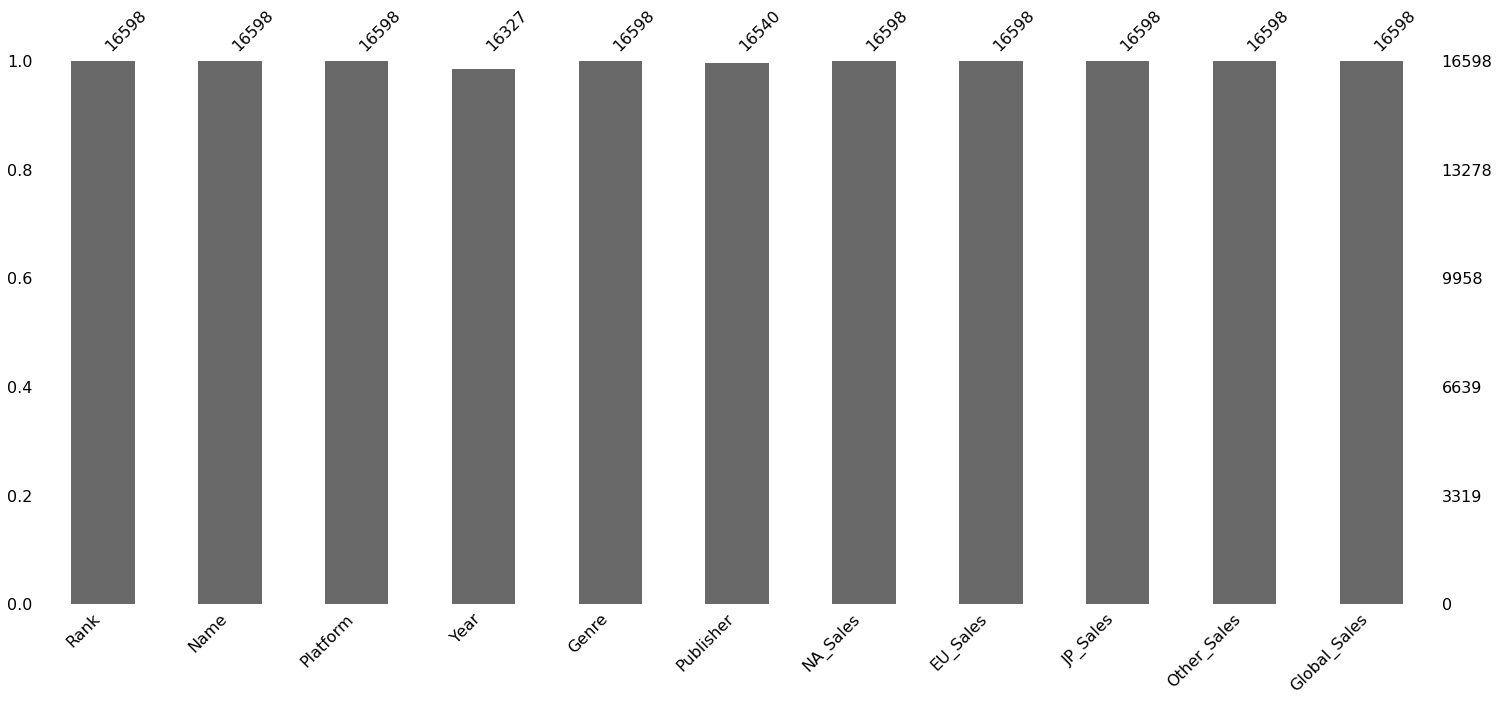

In [10]:
import missingno as msno
msno.bar(df)

<AxesSubplot:>

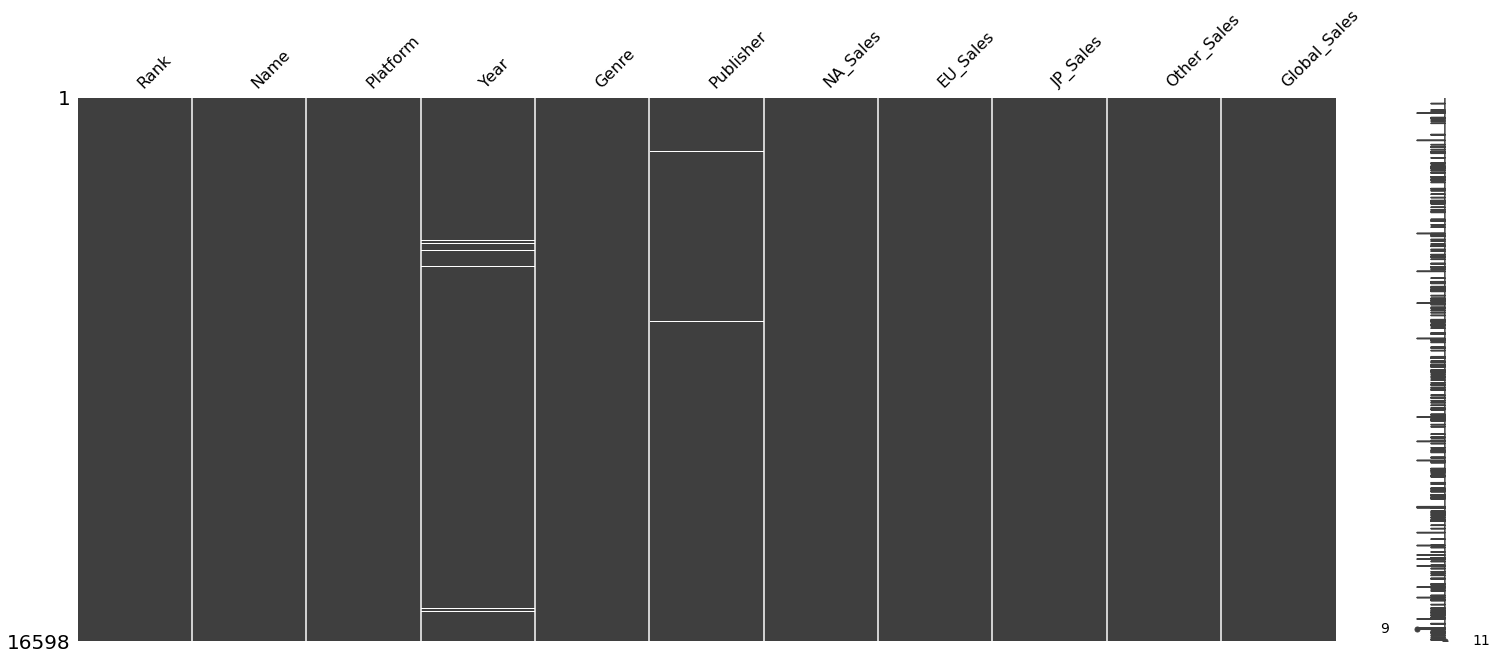

In [11]:
msno.matrix(df)

In [8]:
df.dropna(inplace=True)
df['Year'] = df['Year'].astype('int')
df.head(2)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


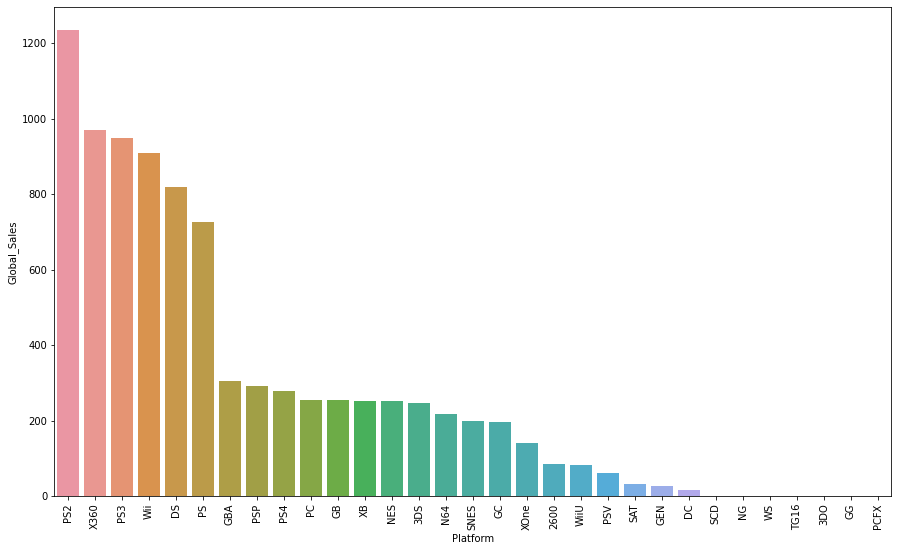

In [10]:
# Nombre de jeux vendus par plateforme 

df_platform = df.groupby("Platform").sum().sort_values(by="Global_Sales", ascending = False)

plt.figure(figsize=[15,9])
sns.barplot(x=df_platform.index, y="Global_Sales", data=df_platform)
plt.xticks(rotation=90);

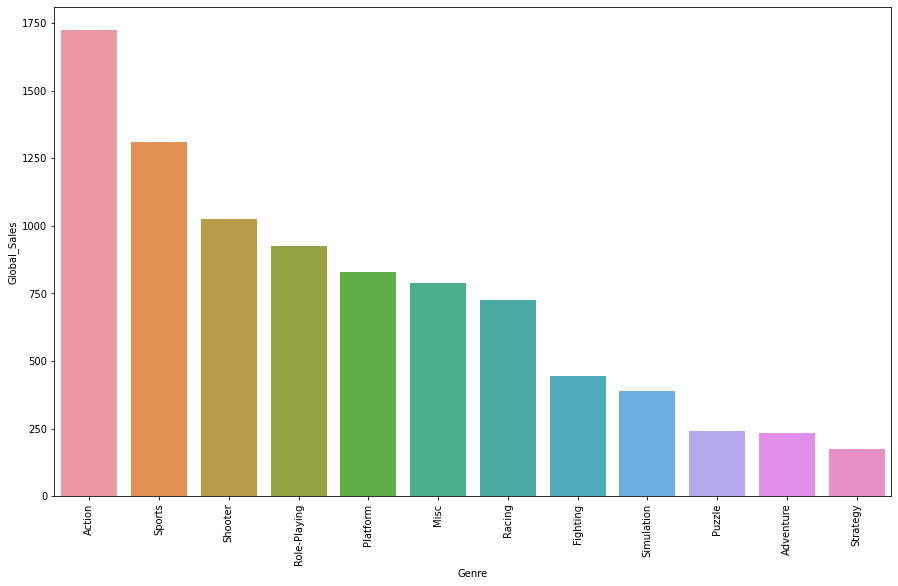

In [11]:
# Nombre de jeux vendus dans le monde par catégorie

df_genre = df.groupby("Genre").sum().sort_values(by="Global_Sales", ascending=False)

plt.figure(figsize=[15,9])
sns.barplot(x=df_genre.index, y="Global_Sales", data=df_genre)
plt.xticks(rotation=90);

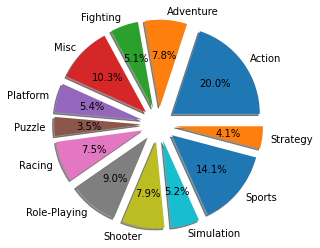

In [13]:
col = "Genre"
count = df[col].value_counts().sort_index()/df.shape[0] * 100
values = count.index
freq_percent = count.values

explode = tuple([0.2 for freq in freq_percent])
plt.pie(freq_percent,labels=values, explode=explode, autopct='%1.1f%%', shadow=True);

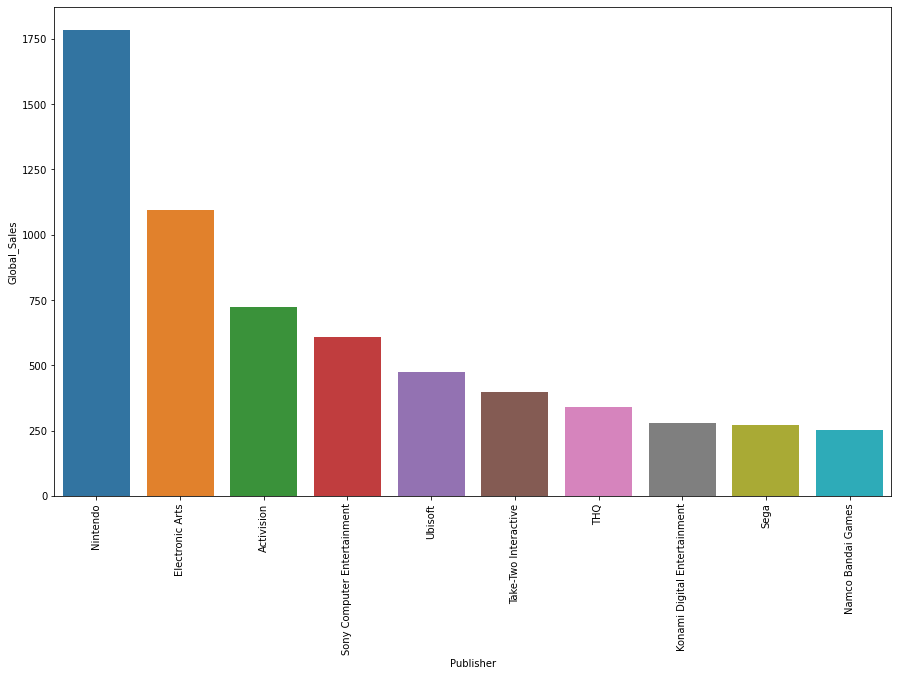

In [14]:
# Nombre de jeux vendus dans le monde par éditeur 

df_publisher = df.groupby(['Publisher']).sum().sort_values(by="Global_Sales",ascending=False).head(10)

plt.figure(figsize=[15,9])
sns.barplot(x=df_publisher.index, y="Global_Sales", data=df_publisher)
plt.xticks(rotation=90);

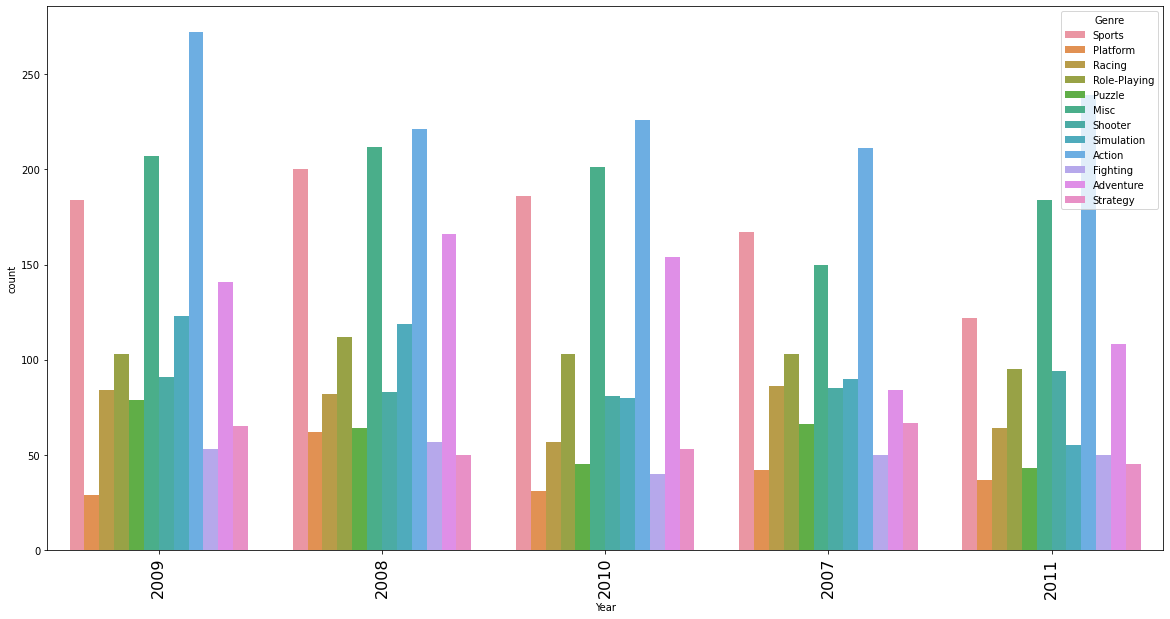

In [15]:
# Nombre de jeux produit en fonction des catégories sur les 5 dernières années

plt.figure(figsize=(20, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df["Year"].value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90);

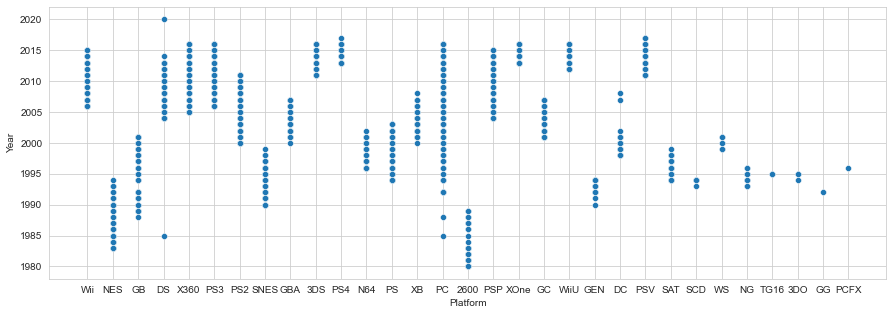

In [16]:
# Période de vente de jeu de chaque plateforme

sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
sns.scatterplot(x = "Platform", y = "Year", data = df);

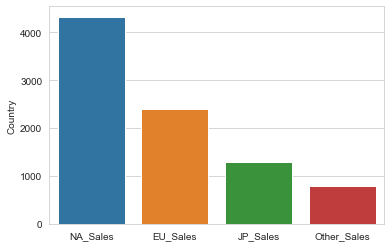

In [17]:
# Continent qui vend le plus de jeux

df_country_sales = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
df_country_sales = pd.DataFrame(data = df_country_sales)
df_country_sales = df_country_sales.rename(columns={0:"Country"})

sns.barplot(x=df_country_sales.index, y="Country", data=df_country_sales);

In [18]:
top_publisher =  df[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_count
publisher= top_publisher_count['Publisher']

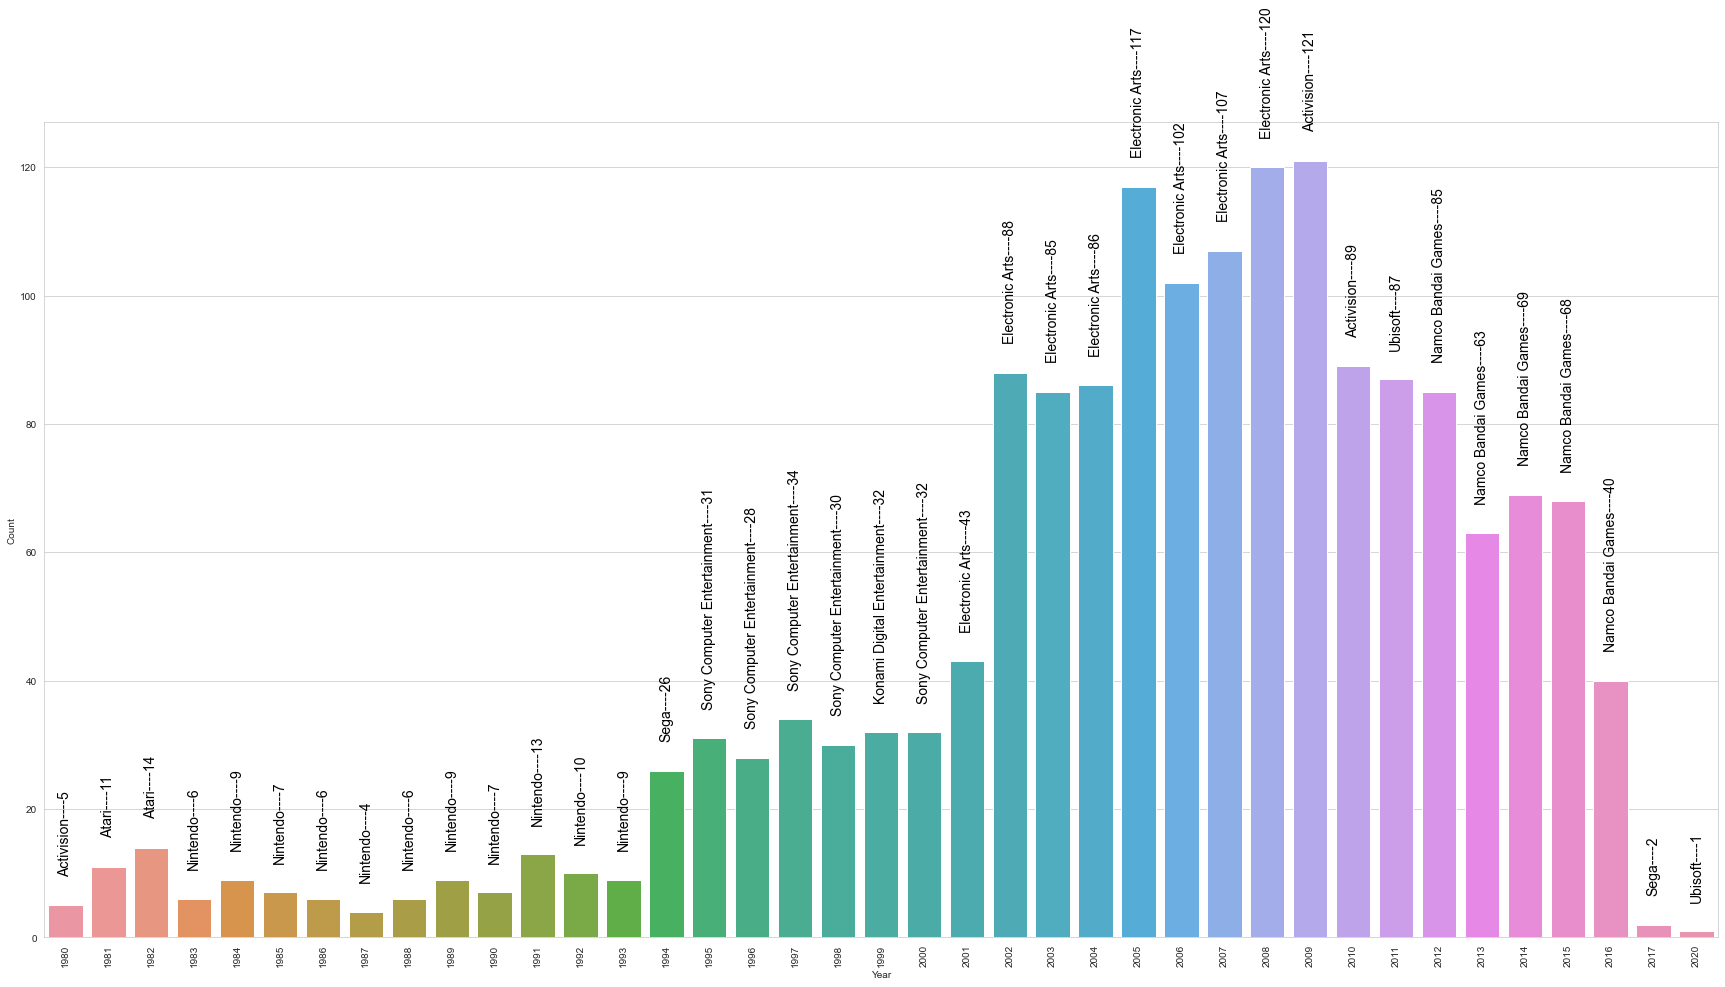

In [19]:
# Nombre de jeux sortis par année + l'éditeur qui vend le plus chaque année

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1


plt.xticks(rotation=90)
plt.show()

### La Moyenne Des Ventes Par Region

<BarContainer object of 4 artists>

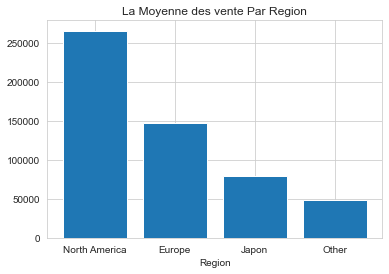

In [20]:
north_amera_sales = df['NA_Sales'].mean() * 1000000
europe_sales = df['EU_Sales'].mean() * 1000000
japon_sales = df['JP_Sales'].mean() * 1000000
other_sales = df['Other_Sales'].mean() * 1000000

columns = ['North America','Europe','Japon','Other']
values = [north_amera_sales,europe_sales,japon_sales,other_sales]
plt.title('La Moyenne des vente Par Region')
plt.xlabel('Region')
plt.bar(columns,values)

### les jeux qui réalisent actuellement le plus de ventes dans le monde ?

Text(0.5, 0, 'Global Sales')

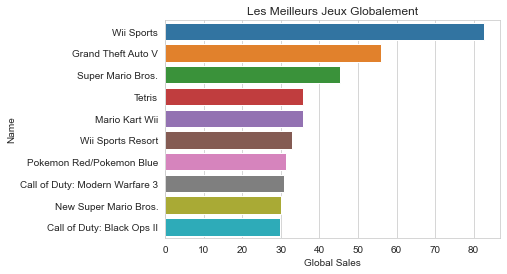

In [21]:
top = pd.DataFrame(df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=False).reset_index())
top_10 = pd.DataFrame(top.head(10))
ax = sns.barplot(x='Global_Sales', y='Name', data=top_10)
ax.set_title('Les Meilleurs Jeux Globalement')
ax.set_xlabel('Global Sales')

### les plateformes de jeux les plus utilisées  par région 

In [23]:
region_JP = pd.DataFrame(df.groupby('Name')[['JP_Sales']].mean().sort_values(by=['JP_Sales'],ascending=False).reset_index())
region_NA = pd.DataFrame(df.groupby('Name')[['NA_Sales']].mean().sort_values(by=['NA_Sales'],ascending=False).reset_index())
region_EU = pd.DataFrame(df.groupby('Name')[['EU_Sales']].mean().sort_values(by=['EU_Sales'],ascending=False).reset_index())
region_OTH = pd.DataFrame(df.groupby('Name')[['Other_Sales']].mean().sort_values(by=['Other_Sales'],ascending=False).reset_index())

Text(0.5, 0, 'Jeux')

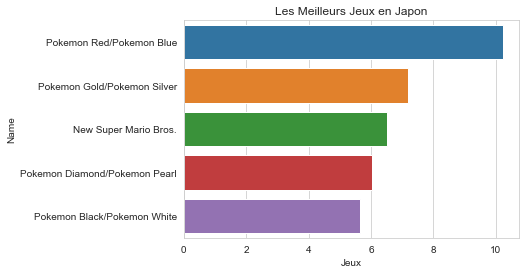

In [24]:
ax = sns.barplot(x='JP_Sales', y='Name', data=region_JP[:5])
ax.set_title('Les Meilleurs Jeux en Japon')
ax.set_xlabel('Jeux')

Text(0.5, 0, 'Jeux')

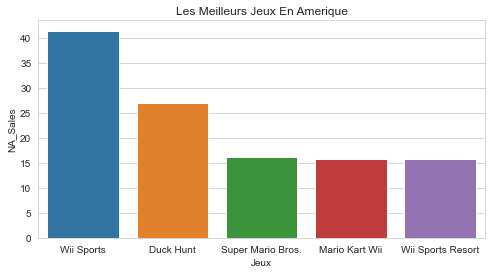

In [25]:
fig , ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(x='Name', y='NA_Sales', data=region_NA[:5])
ax.set_title('Les Meilleurs Jeux En Amerique')
ax.set_xlabel('Jeux')

Text(0.5, 0, 'Jeux')

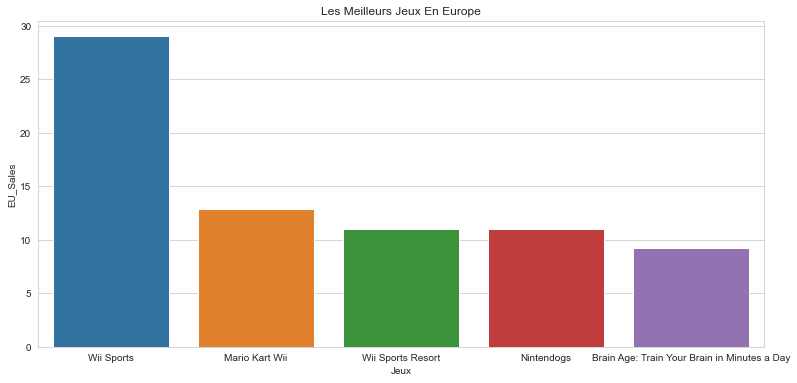

In [26]:
fig , ax = plt.subplots(figsize=(13,6))
ax = sns.barplot(x='Name', y='EU_Sales', data=region_EU[:5])
ax.set_title('Les Meilleurs Jeux En Europe')
ax.set_xlabel('Jeux')

Text(0.5, 0, 'Jeux')

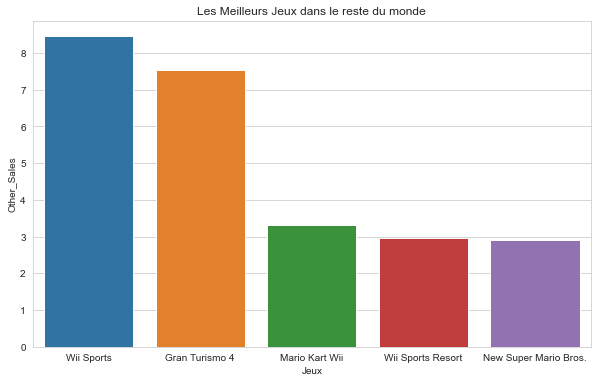

In [27]:
fig , ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Name', y='Other_Sales', data=region_OTH[:5])
ax.set_title('Les Meilleurs Jeux dans le reste du monde')
ax.set_xlabel('Jeux')

### les jeux qui réalisent de forte ventes dans le Monde

Text(0.5, 0, 'Jeux')

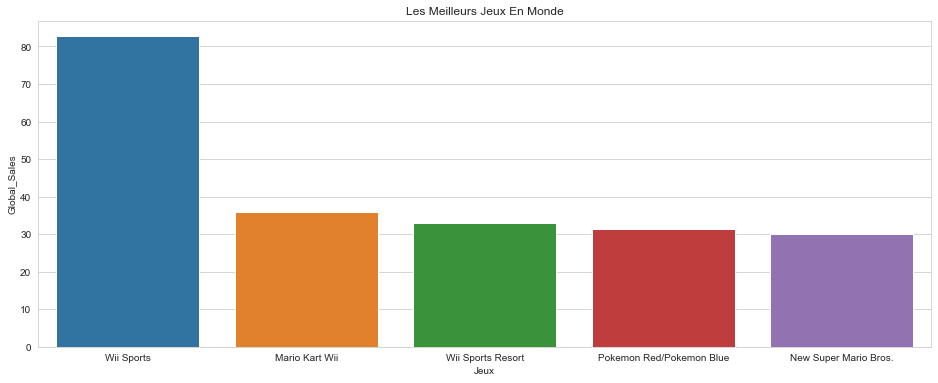

In [28]:
global_games = df.groupby('Name')[['Global_Sales']].mean().sort_values(['Global_Sales'],ascending=False).reset_index()
fig , ax = plt.subplots(figsize=(16,6))
ax = sns.barplot(x='Name', y='Global_Sales', data=global_games[:5])
ax.set_title('Les Meilleurs Jeux En Monde')
ax.set_xlabel('Jeux')

### Les Genres qui réalisent les plus de ventes 

Text(0.5, 0, 'Genre')

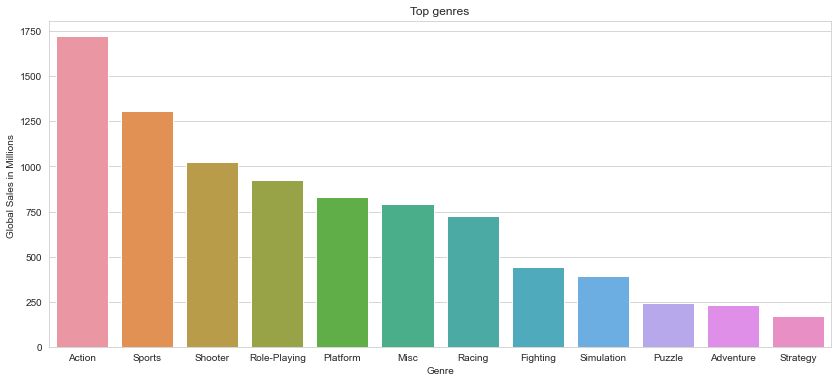

In [29]:
genre_df = df.groupby("Genre")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index()

fig , ax = plt.subplots(figsize=(14,6))
ax = sns.barplot(x='Genre', y='Global_Sales', data=genre_df)
ax.set_ylabel('Global Sales in Millions ')
ax.set_title('Top genres')
ax.set_xlabel('Genre')

### Les genres entre 1980 - 2000


Text(0.5, 0, 'Genre')

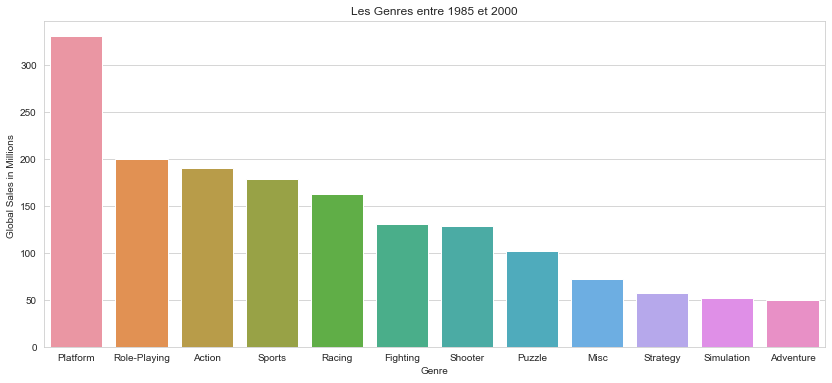

In [30]:
genre_annee = df.loc[df['Year'] < 2000]
genre_annee_df = genre_annee.groupby('Genre')[['Global_Sales']].sum().sort_values(['Global_Sales'],ascending=False).reset_index()
fig , ax = plt.subplots(figsize=(14,6))
ax = sns.barplot(x='Genre', y='Global_Sales', data=genre_annee_df)
ax.set_ylabel('Global Sales in Millions ')
ax.set_title('Les Genres entre 1985 et 2000')
ax.set_xlabel('Genre')


Text(0.5, 0, 'Genre')

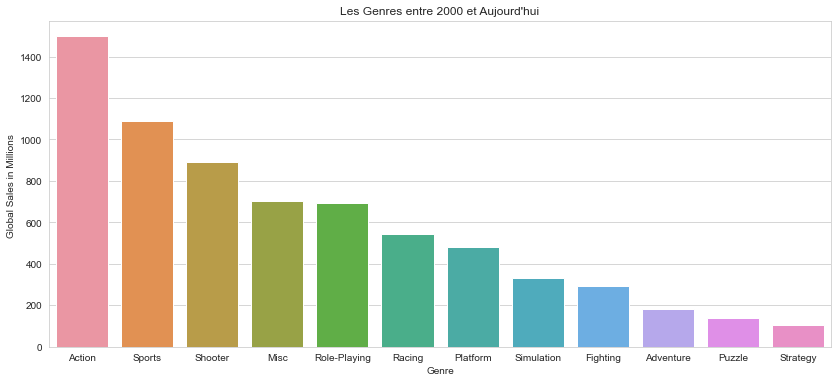

In [31]:
genre_annee = df.loc[(df['Year'] > 2000) & (df['Year'] <= 2022)]
genre_annee_df = genre_annee.groupby('Genre')[['Global_Sales']].sum().sort_values(['Global_Sales'],ascending=False).reset_index()
fig , ax = plt.subplots(figsize=(14,6))
ax = sns.barplot(x='Genre', y='Global_Sales', data=genre_annee_df)
ax.set_ylabel('Global Sales in Millions ')
ax.set_title("Les Genres entre 2000 et Aujourd'hui")
ax.set_xlabel('Genre')

### Les éditeurs qui ont réaliser le plus de ventes en Monde

<AxesSubplot:title={'center':'Global Video Games Sales by Publisher'}, xlabel='Publisher', ylabel='Global Sales (Millions)'>

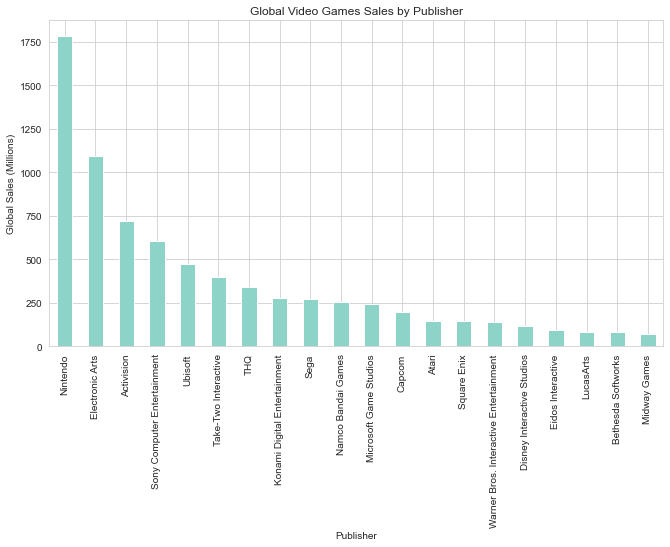

In [32]:
publisher_glb =df.groupby('Publisher')[['Publisher','Global_Sales']].sum().sort_values('Global_Sales', ascending = False).head(20)

publisher_glb['Global_Sales'].plot(kind = 'bar', 
                            figsize = (11,6), 
                            colormap = 'Set3', 
                            ylabel = 'Global Sales (Millions)', 
                            title = 'Global Video Games Sales by Publisher')

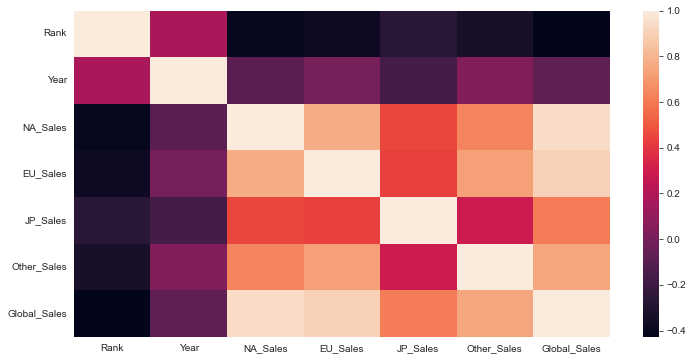

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())
plt.show()

### Machine Learning

In [34]:
from sklearn.model_selection import train_test_split
x = df.drop(labels=['Rank','Year','Name','Platform','Genre','Publisher' ,'Global_Sales'],axis=1)
y = df['Global_Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

c:\Users\Yassine\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 30.47140487188924)

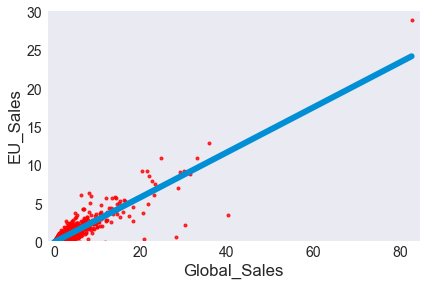

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [36]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model = LR.fit(x_train,y_train)
y_predict = model.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
lr_score = r2_score(y_test,y_predict)
lr_score

0.9999932860147335

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor()
regressor_Tree.fit(x_train,y_train)
y_pred = regressor_Tree.predict(x_test)
dt_score = r2_score(y_test,y_pred)
dt_score

0.8452513198047403

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor_Forest = RandomForestRegressor(random_state=42)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
forest_score = r2_score(y_test,y_pred)
forest_score

0.8308379390825942

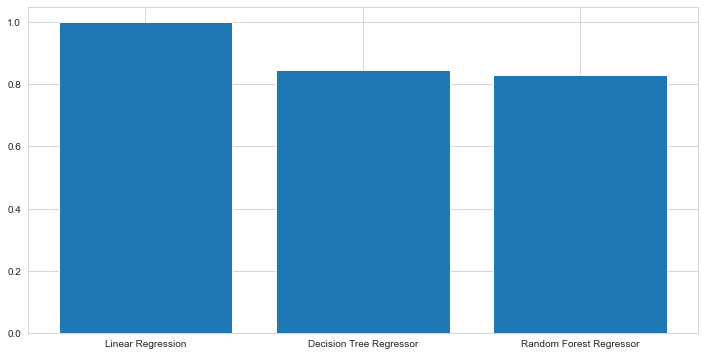

In [40]:
plt.figure(figsize=(12,6))
columns = ['Linear Regression','Decision Tree Regressor','Random Forest Regressor']
values = [lr_score,dt_score,forest_score]
plt.bar(columns,values)
plt.show()

In [44]:
model_using = y_predict
model_using

array([0.57027834, 0.06032873, 0.19034978, ..., 0.09032277, 0.13032058,
       0.18031786])

In [65]:
x.iloc[:,1]


0        29.02
1         3.58
2        12.88
3        11.01
4         8.89
         ...  
16593     0.00
16594     0.00
16595     0.00
16596     0.01
16597     0.00
Name: EU_Sales, Length: 16291, dtype: float64

In [80]:
y_predict

array([0.57027834, 0.06032873, 0.19034978, ..., 0.09032277, 0.13032058,
       0.18031786])

In [81]:
y_test

3527     0.57
12216    0.07
7940     0.19
3030     0.67
7144     0.22
         ... 
13781    0.04
15964    0.02
11193    0.09
9400     0.13
7979     0.19
Name: Global_Sales, Length: 3259, dtype: float64

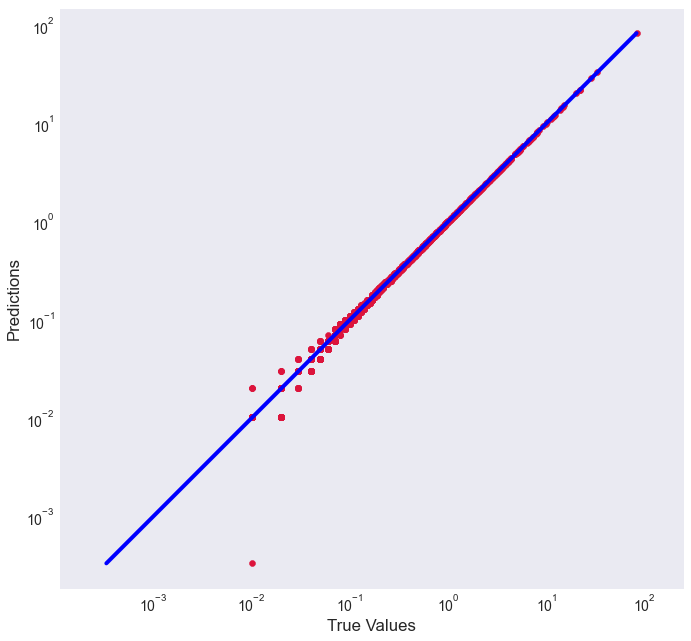

In [131]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted')

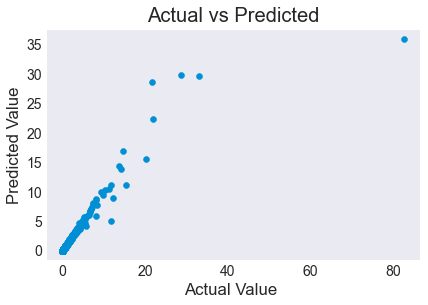

In [88]:
plt.scatter(y_test,y_pred)
plt.plot(pred_df['Actuel Value'], pred_df['Predicted Value'],linestyle='dashed')
plt.xlabel('Actual Value ')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')


In [93]:
pred_df = pd.DataFrame({'Actuel Value' : y_test , 'Predicted Value' : model_using,'Difference' : abs(y_test - y_predict)})

In [119]:
pred_df

,Actuel Value,Predicted Value,Difference
3527,0.57,0.570278,0.000278
12216,0.07,0.060329,0.009671
7940,0.19,0.190350,0.000350
3030,0.67,0.670240,0.000240
7144,0.22,0.220315,0.000315
...,...,...,...
13781,0.04,0.040337,0.000337
15964,0.02,0.010332,0.009668
11193,0.09,0.090323,0.000323
9400,0.13,0.130321,0.000321


Text(0.5, 1.0, 'Actual vs Predicted')

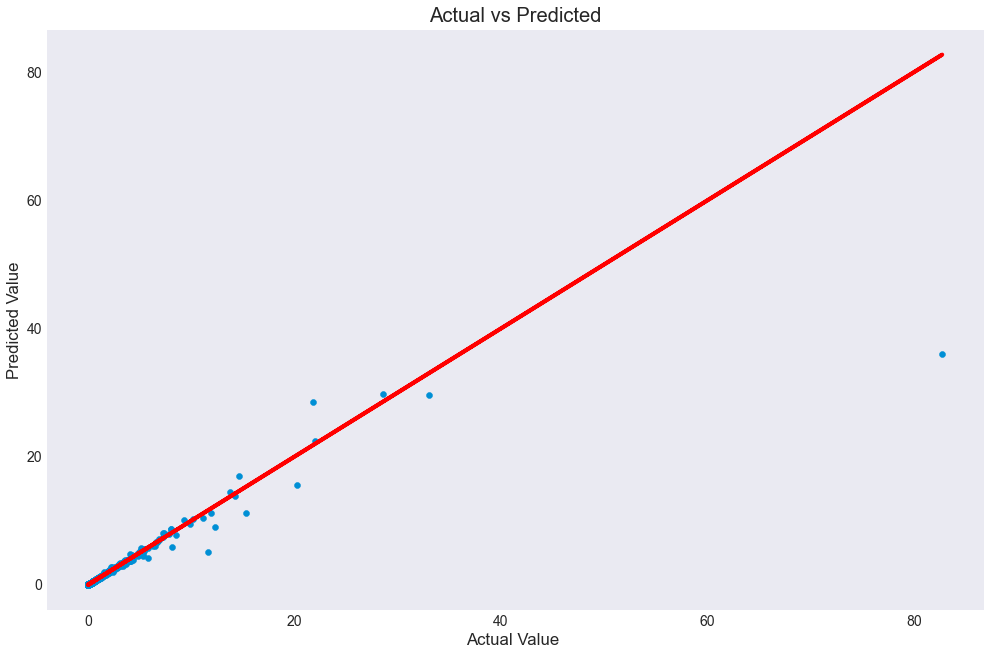

In [140]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.plot(pred_df['Actuel Value'], pred_df['Predicted Value'],'r')
plt.xlabel('Actual Value ')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')


In [142]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64